In [1]:
from calc_dist_matrix import calc_dist_mat
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from calc_centralities import calc_all, calc_all_idx

In [2]:
DIR_pdb = "../data/Structures/wt_templates/"
file_pdb =  "A0A372IUB3.pdb"
name=file_pdb.split(".")[0]

DIR_dist = "../results/Distance_Matricies/MUT"

In [3]:


if not os.path.isdir(DIR_dist):
    os.mkdir(DIR_dist)

calc_dist_mat(os.path.join(DIR_pdb,file_pdb), DIR_dist)


Parsing ../data/Structures/wt_templates/A0A372IUB3.pdb ...


In [4]:
file_dist = f"{file_pdb.split('/')[-1].split('.')[0]}_dist_mat.tsv"
file_dist = os.path.join(DIR_dist, file_dist)

df = pd.read_csv(file_dist, sep = '\t').set_index("Unnamed: 0")#.reset_index(drop=True)

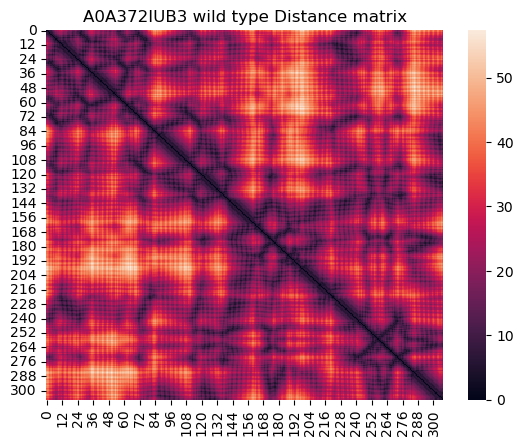

In [5]:
sns.heatmap(df.values)
plt.title(f"{name} wild type Distance matrix")
plt.savefig(f"../results/img/’{name}_distance_mat")

In [6]:
max_distance = 8.0

df.columns = df.index
for col in df.columns:
    df[col].values[df[col]>= max_distance] = 0
    df[col].values[df[col]> 0] = 1

net = nx.from_pandas_adjacency(df)

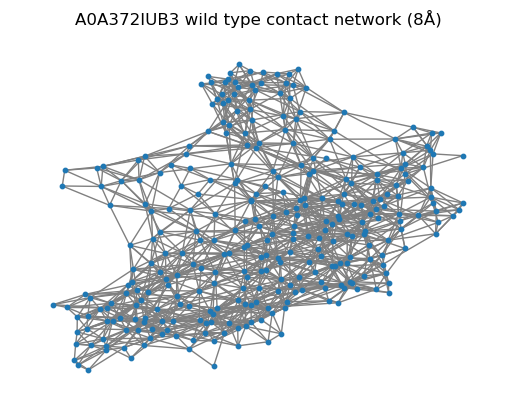

In [8]:
plt.title(f"{name} wild type contact network ({int(max_distance)}Å)")
nx.draw(net, node_size = 10, edge_color = 'gray')

#plt.savefig(f"../results/img/{name}_Network_{int(max_dist)}")

Text(0.5, 1.0, 'A0A372IUB3 wild type contact network (8Å)')

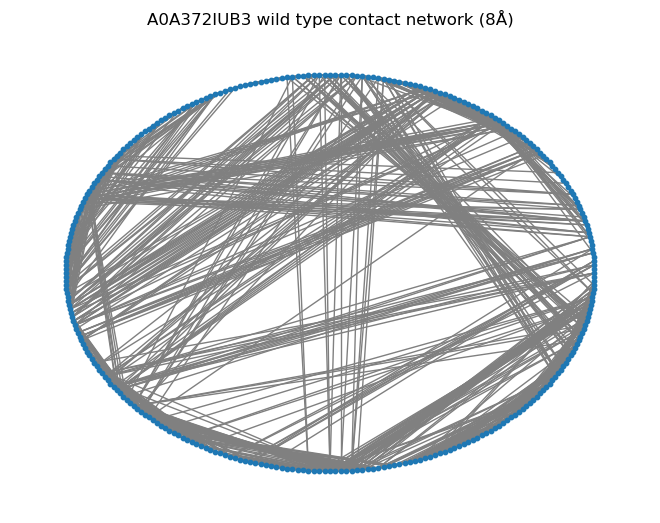

In [11]:
nx.draw_circular(net, node_size = 10, edge_color = 'gray')
plt.title(f"{name} wild type contact network ({int(max_distance)}Å)")
#plt.savefig(f"../results/img/{name}_Network_12_cirk")

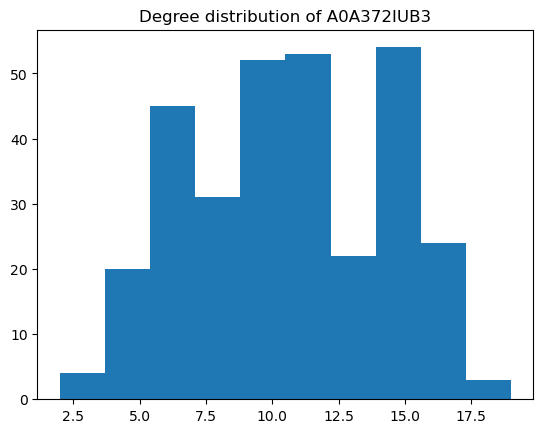

In [12]:
degree_list = [d for n, d in net.degree]

plt.hist(degree_list)
plt.title(f"Degree distribution of {name}")
#plt.savefig(f"../results/img/{name}_degree")
plt.show()
mean_degree = np.mean(degree_list)


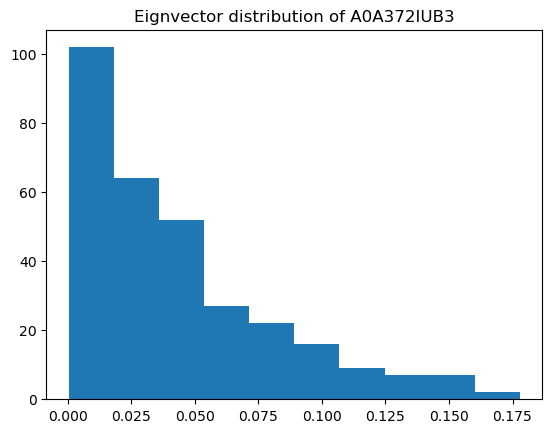

In [14]:
eigenvector_list = [d for n, d in nx.eigenvector_centrality(net).items()]

plt.hist(eigenvector_list)
plt.title(f"Eignvector distribution of {name}")
plt.show()
mean_eigenvector = np.mean(eigenvector_list)

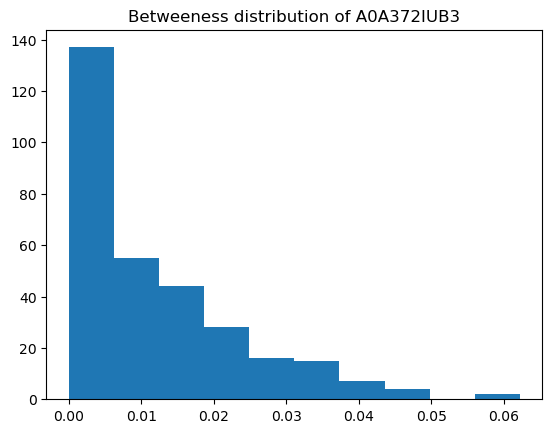

In [15]:

betweenness_list = [d for n, d in nx.betweenness_centrality(net).items()]

plt.hist(betweenness_list)
plt.title(f"Betweeness distribution of {name}")
plt.show()
mean_betweenness = np.mean(list(betweenness_list))

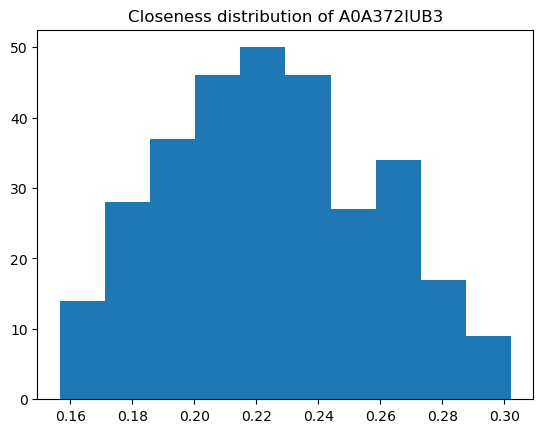

In [16]:
closeness_list = [d for n, d in nx.closeness_centrality(net).items()]

plt.hist(closeness_list)
plt.title(f"Closeness distribution of {name}")
plt.show()
mean_closeness = np.mean(closeness_list)

In [17]:
# Generate distance metricies for mutant

file = [ "725_102", "748_102", "745_60", "735_99"]
_dir = [ "MDH_round2_GAN_grantham", "MDH_round2_GAN_grantham", "MDH_round2_GAN_grantham", "MDH_round2_GAN_grantham"]
names = ["A0A372IUB3"]
DIR_pdb = "../data/Structures/wt_templates/"
#file_pdb =  "A0A372IUB3.pdb"
#name=file_pdb.split(".")[0]

DIR_dist = "../results/Distance_Matricies/MUT"

for f, d in zip(file, _dir):
    DIR_pdb = f"../data/Structures/{d}/"
    file_pdb =  f"A0A372IUB3_{f}.pdb"
    names.append(file_pdb.split(".")[0])
    calc_dist_mat(os.path.join(DIR_pdb,file_pdb), DIR_dist)

Parsing ../data/Structures/MDH_round2_GAN_grantham/A0A372IUB3_725_102.pdb ...
Parsing ../data/Structures/MDH_round2_GAN_grantham/A0A372IUB3_748_102.pdb ...
Parsing ../data/Structures/MDH_round2_GAN_grantham/A0A372IUB3_745_60.pdb ...
Parsing ../data/Structures/MDH_round2_GAN_grantham/A0A372IUB3_735_99.pdb ...


In [18]:

file = ["A0A372IUB3", "A0A372IUB3_725_102", "A0A372IUB3_748_102", "A0A372IUB3_745_60", "A0A372IUB3_735_99"]
_dir = ["WT", "MUT", "MUT", "MUT", "MUT"]

dfs = []
for d, f, name in zip(_dir, file, names):
    file_dist = f"{f}_dist_mat.tsv"
    file_dist = os.path.join(f"../results/Distance_Matricies/{d}", file_dist)

    df = pd.read_csv(file_dist, sep = '\t').set_index("Unnamed: 0")#.reset_index(drop=True)
    dfs.append(calc_all(df, max_distance = 8.0, name=name))
df = pd.concat(dfs)

10.590909090909092	0.011574148956789309	0.22506294498270774	0.04246807565275373
10.681818181818182	0.011518367094147894	0.22580454132274816	0.042045236613511575
10.7012987012987	0.011494243339424408	0.22611519854274625	0.04232704850908609
10.655844155844155	0.01153094739030742	0.2255649056503453	0.042260774040457895
10.662337662337663	0.011502538040188932	0.22604342069861513	0.04204853357323903


Text(0.5, 1.0, 'Degree centrality for wildtype and variants')

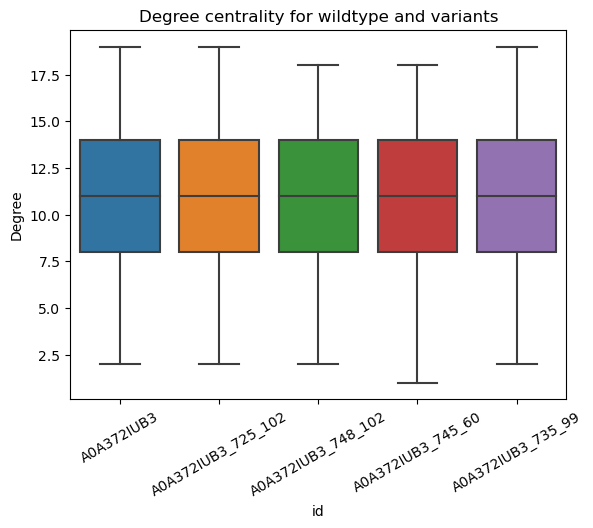

In [19]:

ax = sns.boxplot(data=df, y = "Degree", x="id")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Degree centrality for wildtype and variants")
#plt.savefig("../results/img/degree", bbox_inches="tight")

Text(0.5, 1.0, 'Betweeness centrality for wildtype and variants')

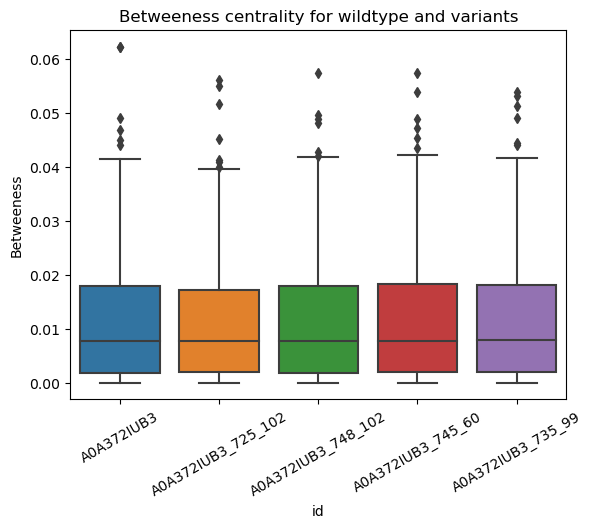

In [20]:
ax = sns.boxplot(data=df, y = "Betweeness", x="id")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Betweeness centrality for wildtype and variants")
#plt.savefig("../results/img/between", bbox_inches="tight")

Text(0.5, 1.0, 'Closeness centrality for wildtype and variants')

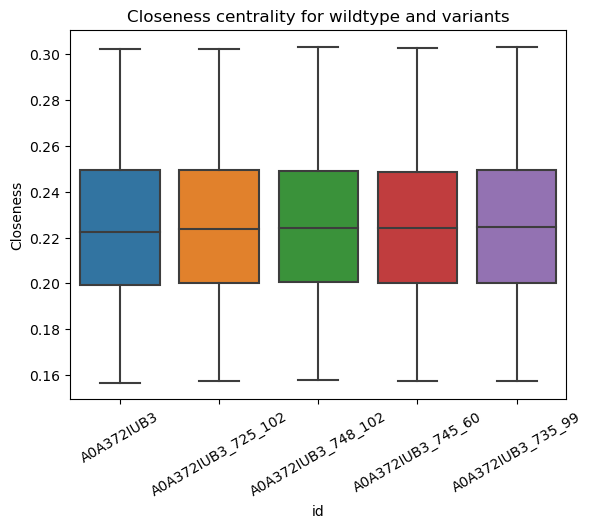

In [21]:
ax = sns.boxplot(data=df, y = "Closeness", x="id")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Closeness centrality for wildtype and variants")
#plt.savefig("../results/img/closeness", bbox_inches="tight")

Text(0.5, 1.0, 'Eigenvector centrality for wildtype and variants')

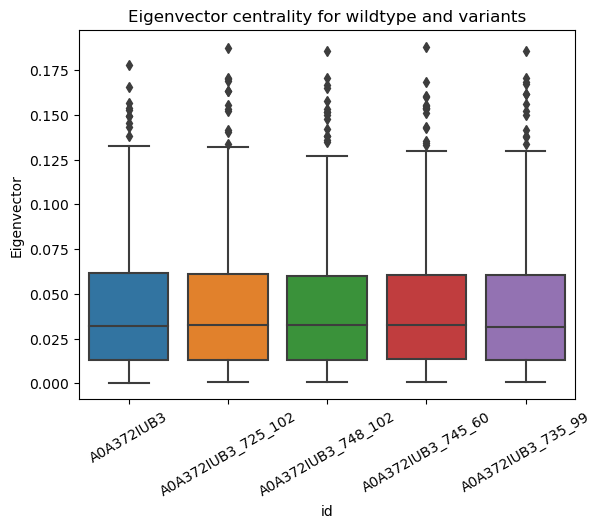

In [22]:
ax = sns.boxplot(data=df, y = "Eigenvector", x="id")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Eigenvector centrality for wildtype and variants")
#plt.savefig("../results/img/eigenvector", bbox_inches="tight")

In [25]:
wt_seq = "MRKKVTIVGAGNVGATAAHWIASKELADVVLIDVVEGVPQGKGLDLLEAMPIEKRDAHILGTNDYADTANSDIVVITAGIARKPGMSRDDLLQTNYKIMSDVVGKAIAASPDCILIIVSNPLDAMAQTAYRQAKFNRNRVIGMAGVLDSARFRTFIAEELKVSVENVTAFVLGGHGDTMVPLARYSTVAGIPITELIPKERLDAIVQRTRDGGAEIVKYLKTGSAYYAPSAAAVEMVEAILKDKKKILPCAAFLEGEYGISGYYIGVPCKLGARGLEQIIEIRLTPEEEAALKKSAEAVKELCAVIGV"

In [26]:
from Bio import SeqIO

In [27]:
file_fasta_mut = "../data/Sequences/ThermalGAN/ThermalGAN_mut_round2.fasta"

names = [ "A0A372IUB3_102_7250", "A0A372IUB3_102_7480", "A0A372IUB3_60_7450", "A0A372IUB3_99_7350"]
_dir = [ "MUT", "MUT", "MUT", "MUT"]

idxs = {}
for rec in SeqIO.parse(file_fasta_mut, "fasta"): 
    #print(rec.id)
    if rec.id in names:
        print(rec.id)
        idxs[rec.id] = [i for i, (res_wt, res_mut) in  enumerate(zip(wt_seq, str(rec.seq))) if res_wt != res_mut]

print(idxs)
file = [ "A0A372IUB3_725_102", "A0A372IUB3_748_102", "A0A372IUB3_745_60", "A0A372IUB3_735_99"]
_dir = [ "MUT", "MUT", "MUT", "MUT"]



DIR_pdb = "../data/Structures/wt_templates/"
file_pdb =  "A0A372IUB3.pdb"
name=file_pdb.split(".")[0]
DIR_dist = "../results/Distance_Matricies/WT"
file_dist = f"{file_pdb.split('/')[-1].split('.')[0]}_dist_mat.tsv"
file_dist = os.path.join(DIR_dist, file_dist)
df_wt = pd.read_csv(file_dist, sep = '\t').set_index("Unnamed: 0")#.reset_index(drop=True)


dfs = []
for d, f, name in zip(_dir, file, names):
    file_dist = f"{f}_dist_mat.tsv"
    file_dist = os.path.join(f"../results/Distance_Matricies/{d}", file_dist)

    df = pd.read_csv(file_dist, sep = '\t').set_index("Unnamed: 0")#.reset_index(drop=True)
    dfs.append(calc_all_idx(df, max_distance = 8.0, name=f, idx = idxs[name], type = "Variant"))
    dfs.append(calc_all_idx(df_wt, max_distance = 8.0, name=f, idx = idxs[name], type = "Wild type"))
df = pd.concat(dfs)

A0A372IUB3_99_7350
A0A372IUB3_102_7250
A0A372IUB3_102_7480
A0A372IUB3_60_7450
{'A0A372IUB3_99_7350': [5, 16, 18, 19, 22, 30, 59, 70, 95, 105, 112, 118, 131, 160, 203, 206, 297, 302], 'A0A372IUB3_102_7250': [11, 16, 19, 22, 30, 57, 112, 116, 118, 131, 135, 137, 160, 203, 206, 268, 297, 302], 'A0A372IUB3_102_7480': [11, 16, 19, 22, 30, 57, 92, 112, 118, 125, 131, 135, 137, 160, 203, 206, 268, 302], 'A0A372IUB3_60_7450': [5, 11, 18, 19, 57, 70, 88, 105, 112, 137, 206, 268]}
10.666666666666666	0.010867079359844002	0.2234077814250846	0.05004400478464136
10.61111111111111	0.010918206516584594	0.2231191715285336	0.04901762388251926
10.666666666666666	0.010587447946529778	0.22337602724771044	0.0472468938913992
10.666666666666666	0.011273655414117234	0.22345436213055114	0.04759599340949373
10.583333333333334	0.008157114155931558	0.2182469935176279	0.04462847337141145
10.75	0.009066315827916711	0.21839823318352525	0.04370233100360333
10.0	0.00895585526176156	0.22056066123447754	0.036542476804514

In [28]:
df

,id,Degree,Eigenvector,Betweeness,Closeness,Class,idx
0,A0A372IUB3_725_102,8,0.034634,0.001275,0.210562,Variant,11
1,A0A372IUB3_725_102,15,0.065806,0.021617,0.232224,Variant,16
2,A0A372IUB3_725_102,10,0.018337,0.004235,0.198834,Variant,19
3,A0A372IUB3_725_102,6,0.006301,0.000053,0.176234,Variant,22
4,A0A372IUB3_725_102,6,0.022926,0.000223,0.217730,Variant,30
...,...,...,...,...,...,...,...
13,A0A372IUB3_735_99,15,0.100097,0.031222,0.274597,Wild type,160
14,A0A372IUB3_735_99,9,0.025281,0.002800,0.207292,Wild type,203
15,A0A372IUB3_735_99,11,0.045211,0.006395,0.229447,Wild type,206
16,A0A372IUB3_735_99,10,0.044679,0.014484,0.241163,Wild type,297


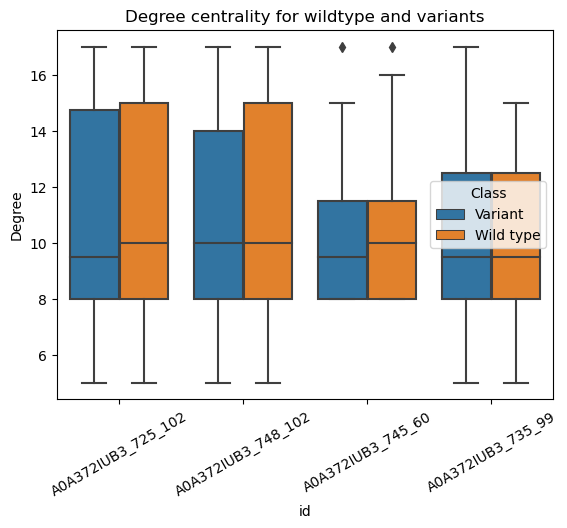

In [13]:
ax = sns.boxplot(data=df, y = "Degree", x="id", hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Degree centrality for wildtype and variants")
plt.savefig("../results/img/degree_v", bbox_inches="tight")

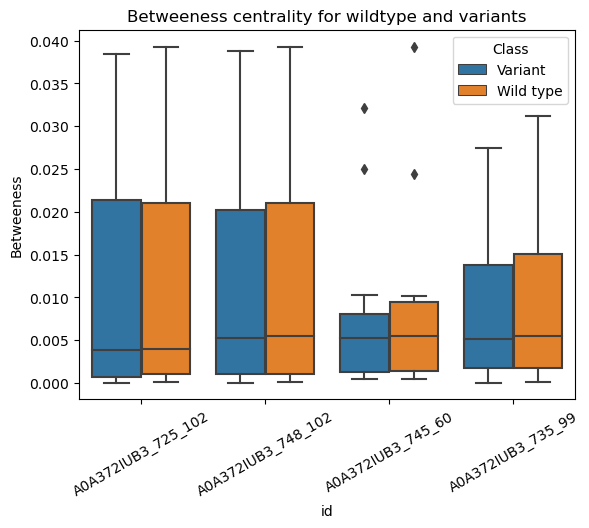

In [14]:
ax = sns.boxplot(data=df, y = "Betweeness", x="id", hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Betweeness centrality for wildtype and variants")
plt.savefig("../results/img/between_v", bbox_inches="tight")

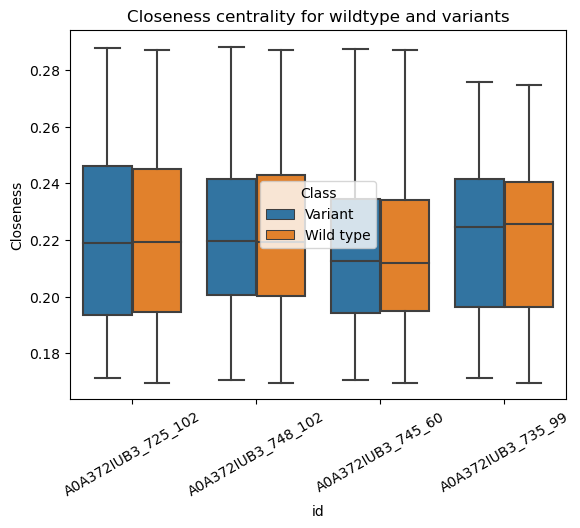

In [15]:
ax = sns.boxplot(data=df, y = "Closeness", x="id", hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Closeness centrality for wildtype and variants")
plt.savefig("../results/img/closeness_v", bbox_inches="tight")

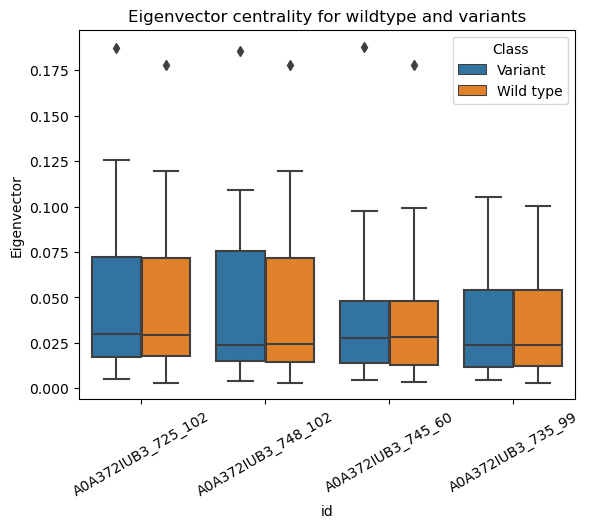

In [16]:
ax = sns.boxplot(data=df, y = "Eigenvector", x="id", hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Eigenvector centrality for wildtype and variants")
plt.savefig("../results/img/eigenvector_v", bbox_inches="tight")

In [31]:
# load dict wt round 2
file_wt_round2 = "../data/Sequences/ThermalGAN/ThermalGAN_WT_round2.fasta"
dict_wt_round2 = {}
for rec in SeqIO.parse(file_wt_round2, "fasta"):
    dict_wt_round2[rec.id] = (rec.id, str(rec.seq))

# load dict wt round 3
file_wt_round3 = "../data/Sequences/ThermalGAN/ThermalGAN_WT_round3.fasta"
dict_wt_round3 = {}
for rec in SeqIO.parse(file_wt_round3, "fasta"):
    dict_wt_round3[rec.id] = (rec.id, str(rec.seq))

# Create lists from round 2
file_wt_round2 = "../data/Sequences/ThermalGAN/ThermalGAN_mut_round2.fasta"
list_wt_round2 = []
list_mut_round2= []
dict_mut_round2={}
list_id = []
for rec in SeqIO.parse(file_wt_round2, "fasta"):
    list_wt_round2.append(dict_wt_round2[rec.id.split('_')[0]][1])
    list_mut_round2.append(str(rec.seq))
    dict_mut_round2[rec.id] = [str(rec.seq), dict_wt_round2[rec.id.split('_')[0]][1]]
    list_id.append(rec.id) 

In [32]:
DIR = file  = f"../results/Likelihoods/"
print(os.listdir(DIR))

['predictions_A0A372IUB3_102_7250.pkl', '.ipynb_checkpoints', 'predictions_A0A372IUB3_60_7450.pkl', 'predictions_A0A372IUB3_99_7350.pkl', 'predictions_A0A372IUB3_102_7480.pkl']


In [33]:
import pickle

In [34]:

dict_variants = {}

for file in os.listdir(DIR):
    if file.split('.')[0] == '':
        continue
    with open(f"../results/Likelihoods/{file}", "br") as f:
        d = pickle.load(f)
        
        key = f"{file.split('_')[1]}_{file.split('_')[2]}_{file.split('_')[3]}".split(".")[0]


    # Get variant

    idxes ={i: (res_mut, res_wt) for i, (res_mut, res_wt) in enumerate(zip(dict_mut_round2[key][0], dict_mut_round2[key][1])) if res_mut != res_wt}
    lik = {i: d[i][res_mut] -  d[i][res_wt] for i, (res_mut, res_wt) in enumerate(zip(dict_mut_round2[key][0], dict_mut_round2[key][1])) if res_mut != res_wt}
    
    dict_variants[key] = {"probabilities":d,
                         "Mut_seq": dict_mut_round2[key][0],
                         "WT_seq":  dict_mut_round2[key][1],
                         "idxs": idxes,
                         "likeliehoods_of_mut": lik}

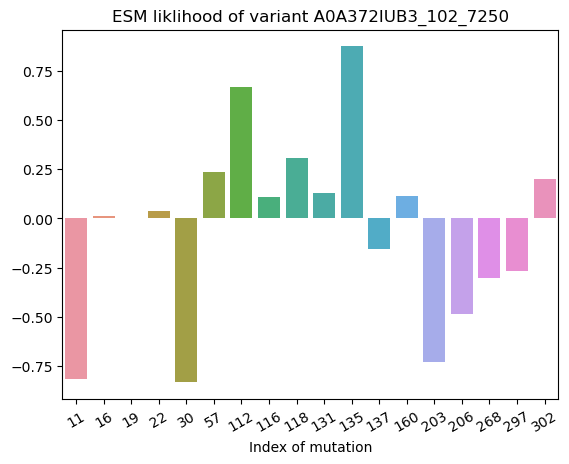

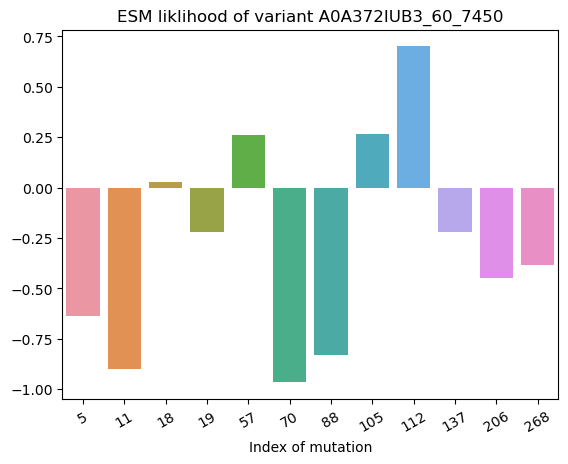

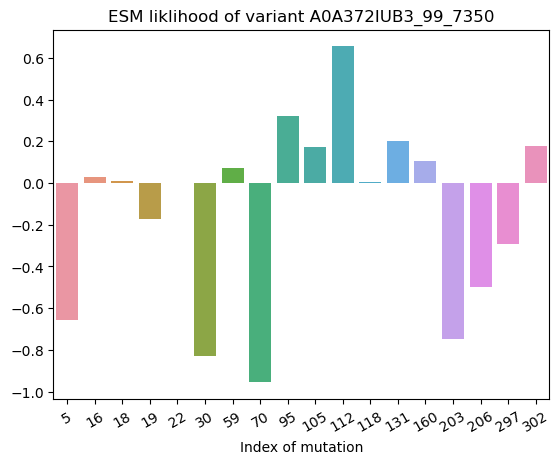

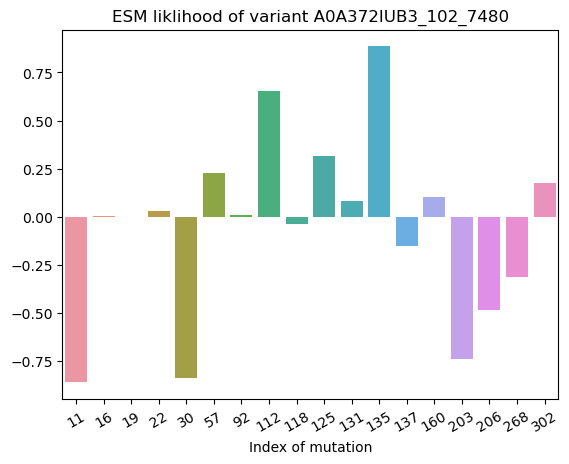

In [106]:
for rec in dict_variants.items():
    plt.figure()
    y = [  j for i, j in rec[1]["likeliehoods_of_mut"].items()]
    x = [  i for i, j in rec[1]["likeliehoods_of_mut"].items()]

    ax = sns.barplot(x = x, y = y)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(f"ESM liklihood of variant {rec[0]}")
    ax.set_xlabel("Index of mutation")
    plt.savefig(f"../results/img/likelihoods_{rec[0]}", bbox_inches="tight")

In [50]:
def labelmaker_9000(name):
    if name in ["A0A372IUB3_725_102", "A0A372IUB3_748_102"]:
        return "Soluble"
    else:
        return "In-Soluble"
l = []
for row in  df.iterrows():
    id = row[1]["id"].split("_")
    
    var = dict_variants[f"{id[0]}_{id[2]}_{id[1]}0"]
    if row[1]["Class"] == "Variant":
        l.append(var["likeliehoods_of_mut"][row[1]["idx"]])
    else:
        l.append((var["likeliehoods_of_mut"][row[1]["idx"]]) * -1)
df["likelihoods"] = l
df["sol"] = df["id"].apply(lambda x: labelmaker_9000(x))

In [51]:
df.head(n=60)

,id,Degree,Eigenvector,Betweeness,Closeness,Class,idx,likelihoods,sol
0,A0A372IUB3_725_102,8,0.034634,0.001275,0.210562,Variant,11,-0.813310,Soluble
1,A0A372IUB3_725_102,15,0.065806,0.021617,0.232224,Variant,16,0.011680,Soluble
2,A0A372IUB3_725_102,10,0.018337,0.004235,0.198834,Variant,19,0.004507,Soluble
3,A0A372IUB3_725_102,6,0.006301,0.000053,0.176234,Variant,22,0.040057,Soluble
4,A0A372IUB3_725_102,6,0.022926,0.000223,0.217730,Variant,30,-0.832253,Soluble
5,A0A372IUB3_725_102,17,0.187090,0.024664,0.287723,Variant,57,0.235422,Soluble
6,A0A372IUB3_725_102,8,0.004950,0.000440,0.171317,Variant,112,0.667368,Soluble
7,A0A372IUB3_725_102,9,0.007300,0.002945,0.189623,Variant,116,0.107511,Soluble
8,A0A372IUB3_725_102,7,0.005115,0.000486,0.185051,Variant,118,0.307334,Soluble
9,A0A372IUB3_725_102,5,0.021961,0.003369,0.220388,Variant,131,0.130384,Soluble


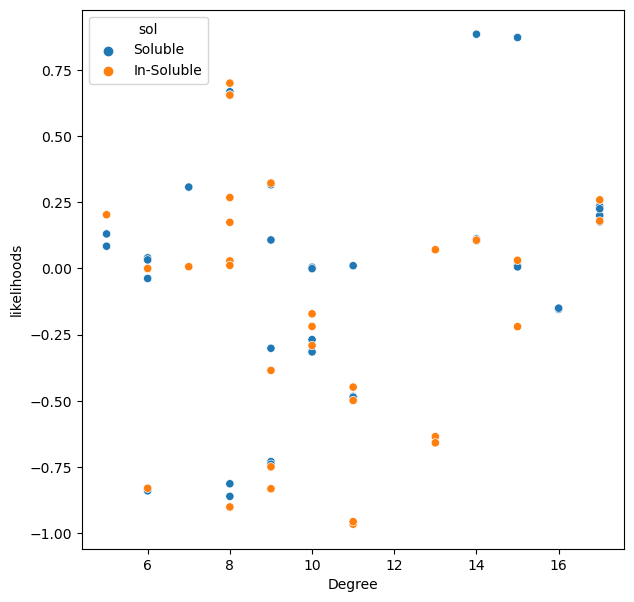

In [92]:

plt.figure(figsize=[7, 7])
sns.scatterplot(data=df.loc[df["Class"] == "Variant"], x="Degree", y = "likelihoods", hue="sol")
plt.savefig("../results/img/likelihood_Degree", bbox_inches="tight")

0.03339810937232122


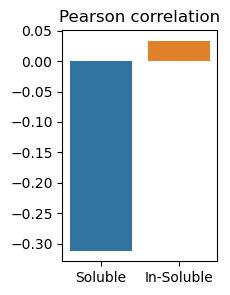

In [105]:
from scipy import stats
plt.figure(figsize=[2, 3])

x = df.loc[np.logical_and(df["Class"] == "Wild type", df["sol"] == "Soluble")]["Degree"]
y = df.loc[np.logical_and(df["Class"] == "Wild type", df["sol"] == "Soluble")]["likelihoods"]
res_sol = stats.pearsonr(x, y)

x = df.loc[np.logical_and(df["Class"] == "Wild type", df["sol"] == "In-Soluble")]["Degree"]
y = df.loc[np.logical_and(df["Class"] == "Wild type", df["sol"] == "In-Soluble")]["likelihoods"]
res_insol = stats.pearsonr(x, y)
print(res_insol[0])
plt.title("Pearson correlation")
sns.barplot(x = ["Soluble", "In-Soluble"], y = [res_sol[0], res_insol[0]])
plt.savefig("../results/img/corr_likelihood_degree", bbox_inches="tight")

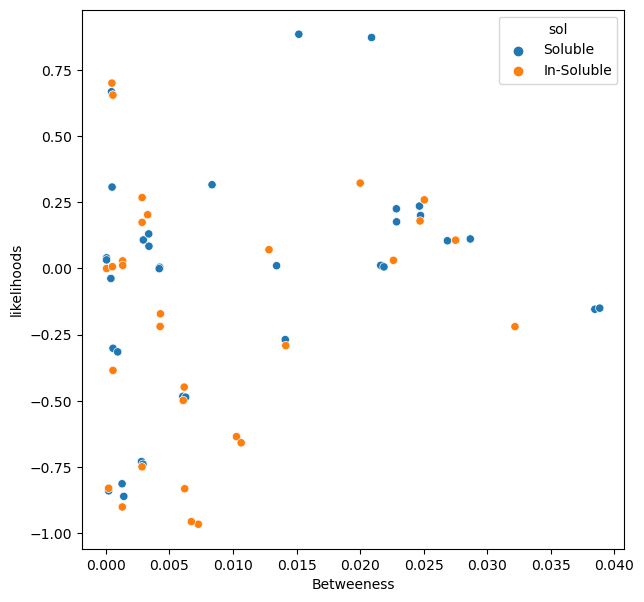

In [94]:
plt.figure(figsize=[7, 7])
sns.scatterplot(data=df.loc[df["Class"] == "Variant"], x="Betweeness", y = "likelihoods", hue="sol")
plt.savefig("../results/img/likelihood_Betweeness", bbox_inches="tight")

0.15327425178030413


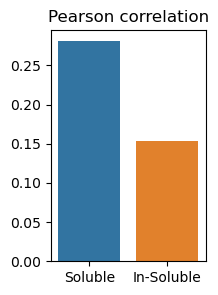

In [95]:
plt.figure(figsize=[2, 3])

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["Betweeness"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["likelihoods"]
res_sol = stats.pearsonr(x, y)

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["Betweeness"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["likelihoods"]
res_insol = stats.pearsonr(x, y)
print(res_insol[0])
plt.title("Pearson correlation")
sns.barplot(x = ["Soluble", "In-Soluble"], y = [res_sol[0], res_insol[0]])
plt.savefig("../results/img/corr_likelihood_Betweeness", bbox_inches="tight")

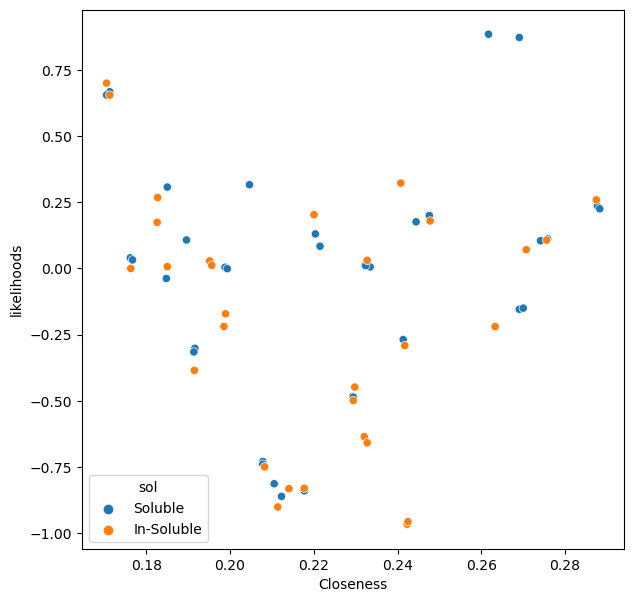

In [96]:
plt.figure(figsize=[7, 7])
sns.scatterplot(data=df.loc[df["Class"] == "Variant"], x="Closeness", y = "likelihoods", hue="sol")
plt.savefig("../results/img/likelihood_Closeness", bbox_inches="tight")

-0.2042068342807574


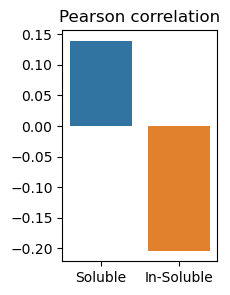

In [98]:
plt.figure(figsize=[2, 3])

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["Closeness"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["likelihoods"]
res_sol = stats.pearsonr(x, y)

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["Closeness"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["likelihoods"]
res_insol = stats.pearsonr(x, y)
print(res_insol[0])
plt.title("Pearson correlation")
sns.barplot(x = ["Soluble", "In-Soluble"], y = [res_sol[0], res_insol[0]])
plt.savefig("../results/img/corr_likelihood_Closeness", bbox_inches="tight")

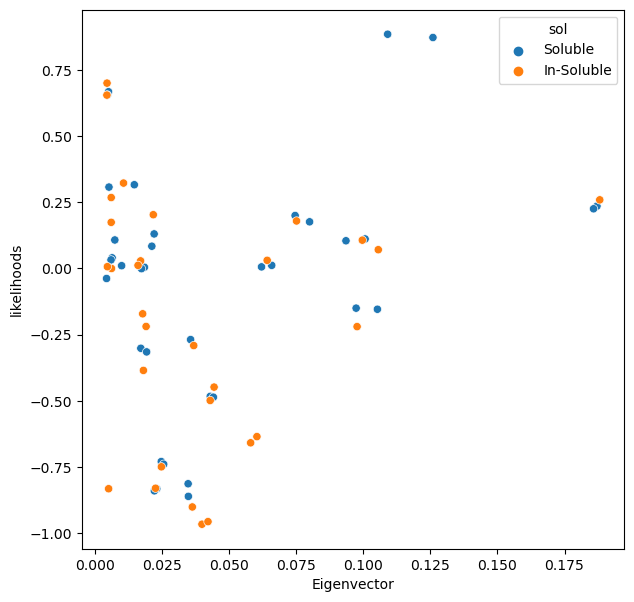

In [99]:
plt.figure(figsize=[7, 7])
sns.scatterplot(data=df.loc[df["Class"] == "Variant"], x="Eigenvector", y = "likelihoods", hue="sol")
plt.savefig("../results/img/likelihood_Eigenvector", bbox_inches="tight")

0.020379482600539157


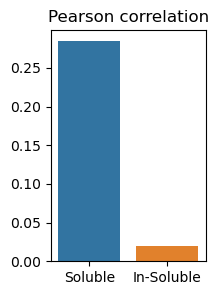

In [104]:
plt.figure(figsize=[2, 3])

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["Eigenvector"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "Soluble")]["likelihoods"]
res_sol = stats.pearsonr(x, y)

x = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["Eigenvector"]
y = df.loc[np.logical_and(df["Class"] == "Variant", df["sol"] == "In-Soluble")]["likelihoods"]
res_insol = stats.pearsonr(x, y)
print(res_insol[0])
plt.title("Pearson correlation")
sns.barplot(x = ["Soluble", "In-Soluble"], y = [res_sol[0], res_insol[0]])
plt.savefig("../results/img/corr_likelihood_Eigenvector", bbox_inches="tight")